https://finance.yahoo.com/quote/FB/history?period1=1337299200&period2=1609632000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true  
https://finance.yahoo.com/quote/AMZN/history?period1=1167782400&period2=1609632000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true  
https://finance.yahoo.com/quote/AAPL/history?period1=1167782400&period2=1609632000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true  
https://finance.yahoo.com/quote/MSFT/history?period1=1167782400&period2=1609632000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true  
https://finance.yahoo.com/quote/GOOG/history?period1=1136246400&period2=1609632000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true  

In [34]:
import os
import datetime

import sqlite3 as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
path = './data/'

In [36]:
#cutoff = datetime.datetime(year=2009, month=1, day=1)
cutoff = datetime.datetime(year=2012, month=7, day=9)

In [37]:
data = {}

for ticker in ('FB', 'AMZN', 'AAPL', 'MSFT', 'GOOG', ):

    df = pd.read_csv(
        os.path.join(path, ticker+'.csv')
    )

    df.columns = df.columns.str.lower()

    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', ascending=True, inplace=True)
    
    df['ma_30'] = df['close'].rolling(window=30, center=False).mean()
    df['ma_5'] = df['close'].rolling(window=5, center=False).mean()
    df['volatil'] = np.abs(df['ma_30']-df['close'])
    df['diff'] = df['close'].diff(periods=1)
    df['diff_ma_5'] = df['close'].diff(periods=1).rolling(window=5, center=False).mean()
    
    df = df[df['date'] >= cutoff]    
    df.dropna(axis=0, inplace=True)
    df.drop(['open', 'high', 'low', 'adj close'], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
        
    print(df.shape, df.loc[0, 'date'])

    data[ticker.lower()] = df


(2136, 8) 2012-07-09 00:00:00
(2136, 8) 2012-07-09 00:00:00
(2136, 8) 2012-07-09 00:00:00
(2136, 8) 2012-07-09 00:00:00
(2136, 8) 2012-07-09 00:00:00


In [38]:
data['fb'].head(5)

,date,close,volume,ma_30,ma_5,volatil,diff,diff_ma_5
0,2012-07-09,32.169998,17785200,29.874333,31.468000,2.295665,0.439998,0.214
1,2012-07-10,31.469999,14269500,29.859667,31.607999,1.610332,-0.699999,0.140
2,2012-07-11,30.969999,13030300,29.930667,31.561999,1.039332,-0.500000,-0.046
3,2012-07-12,30.809999,11300700,30.018000,31.429999,0.791999,-0.160000,-0.132
4,2012-07-13,30.719999,8108300,30.055333,31.227999,0.664666,-0.090000,-0.202


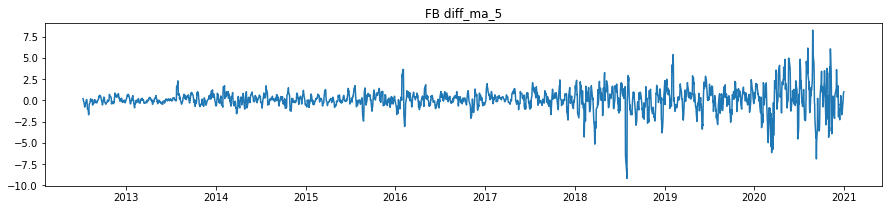

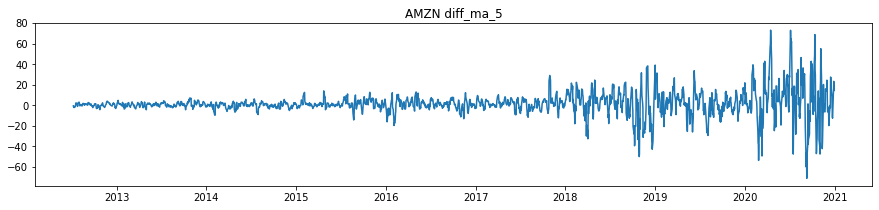

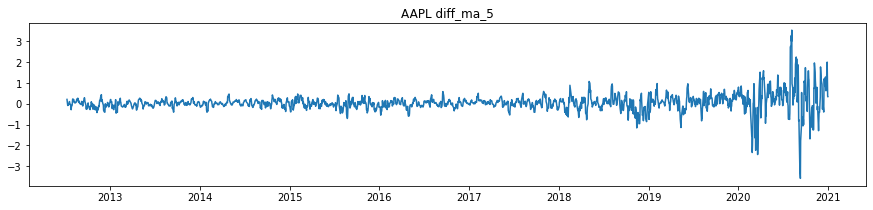

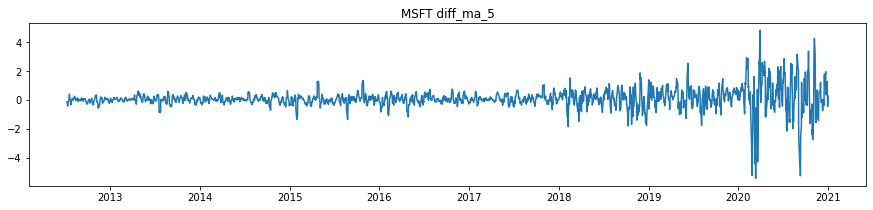

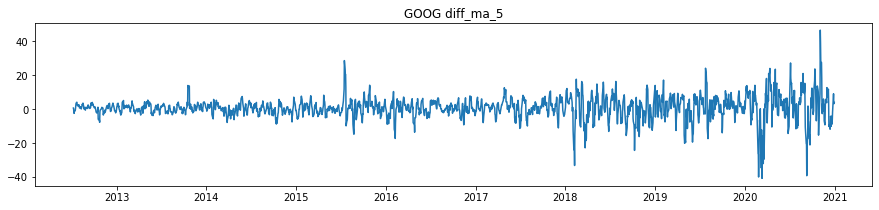

In [39]:
indicator = 'diff_ma_5'

for ticker in data:
    
    plt.figure(figsize=(15,3))
    
    plt.plot(data[ticker]['date'], data[ticker][indicator])
    plt.title(ticker.upper() + ' ' + indicator)
    
    plt.show()

In [49]:
def build_table(conn, table_name, table_data):
    
    table_data.to_sql(
        name=table_name, 
        con=conn, 
        index=False, 
        if_exists='replace',
    )
    
    conn.commit()
    

In [50]:
db_name = 'HistoricalPriceData.db'

In [53]:
connection = sql.connect(
    os.path.join(
        path, 
        db_name,
    )
)

for ticker in data:
    
    try:
        build_table(connection, ticker, data[ticker])
        print('Done', ticker, sep=' - ')

    except Exception as e:
        print('Exception', ticker, e, sep=' - ')
        
connection.close()

Done - fb
Done - amzn
Done - aapl
Done - msft
Done - goog


---

In [54]:
from utils.utilities import fetch_data, validate_data

In [55]:
data = fetch_data('data/HistoricalPriceData.db')

In [56]:
data['fb'].head()

,date,close,volume,ma_30,ma_5,volatil,diff,diff_ma_5
0,2012-07-09,32.169998,17785200,29.874333,31.468000,2.295665,0.439998,0.214
1,2012-07-10,31.469999,14269500,29.859667,31.607999,1.610332,-0.699999,0.140
2,2012-07-11,30.969999,13030300,29.930667,31.561999,1.039332,-0.500000,-0.046
3,2012-07-12,30.809999,11300700,30.018000,31.429999,0.791999,-0.160000,-0.132
4,2012-07-13,30.719999,8108300,30.055333,31.227999,0.664666,-0.090000,-0.202


In [57]:
data['aapl'].head()

,date,close,volume,ma_30,ma_5,volatil,diff,diff_ma_5
0,2012-07-09,21.924643,379405600,20.689178,21.583142,1.235465,0.286072,0.213500
1,2012-07-10,21.721786,511957600,20.743845,21.695214,0.977941,-0.202857,0.112072
2,2012-07-11,21.586786,469322000,20.782131,21.731071,0.804655,-0.135000,0.035857
3,2012-07-12,21.389286,428041600,20.805619,21.652214,0.583667,-0.197500,-0.078857
4,2012-07-13,21.606071,311427200,20.838048,21.645714,0.768023,0.216785,-0.006500
